In [1]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from kneed import KneeLocator
import datetime

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
import plotly.graph_objects as go
import plotly.express as px

from kneed import KneeLocator

In [3]:
data = pd.read_excel("C:\\Users\\anujn\\OneDrive\\Documents\\GitHub\\IPBA_Project_Group_A\\Alt04 -Adidas US Sales Datasets.xlsx")
data.head(2)

Retailer  Retailer ID Invoice Date     Region     State      City  \
0  Foot Locker      1185732   2020-01-01  Northeast  New York  New York   
1  Foot Locker      1185732   2020-01-02  Northeast  New York  New York   

                   Product  Price per Unit  Units Sold  Total Sales  \
0    Men's Street Footwear            50.0        1200     600000.0   
1  Men's Athletic Footwear            50.0        1000     500000.0   

   Operating Profit  Operating Margin Sales Method  
0          300000.0               0.5     In-store  
1          150000.0               0.3     In-store

In [4]:
data['Year'] = pd.DatetimeIndex(data['Invoice Date']).year

In [38]:
data['Operating Margin'] = data['Total Sales'] - data['Operating Profit']
data.head(2)

Retailer Invoice Date     Region     State      City  \
0  Foot Locker   2020-01-01  Northeast  New York  New York   
1  Foot Locker   2020-01-02  Northeast  New York  New York   

                   Product  Price per Unit  Units Sold  Total Sales  \
0    Men's Street Footwear            50.0        1200     600000.0   
1  Men's Athletic Footwear            50.0        1000     500000.0   

   Operating Profit  Operating Margin Sales Method  Year  
0          300000.0          300000.0     In-store  2020  
1          150000.0          350000.0     In-store  2020

# Descriptive statistics

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
 13  Year              9648 non-null   int64         
dtypes: datetime64[ns](1), fl

In [7]:
data = data.drop(['Retailer ID'], axis = 1)
data.head(5)

Retailer Invoice Date     Region     State      City  \
0  Foot Locker   2020-01-01  Northeast  New York  New York   
1  Foot Locker   2020-01-02  Northeast  New York  New York   
2  Foot Locker   2020-01-03  Northeast  New York  New York   
3  Foot Locker   2020-01-04  Northeast  New York  New York   
4  Foot Locker   2020-01-05  Northeast  New York  New York   

                     Product  Price per Unit  Units Sold  Total Sales  \
0      Men's Street Footwear            50.0        1200     600000.0   
1    Men's Athletic Footwear            50.0        1000     500000.0   
2    Women's Street Footwear            40.0        1000     400000.0   
3  Women's Athletic Footwear            45.0         850     382500.0   
4              Men's Apparel            60.0         900     540000.0   

   Operating Profit  Operating Margin Sales Method  Year  
0          300000.0          300000.0     In-store  2020  
1          150000.0          350000.0     In-store  2020  
2          140000.0          260000.0     In-store  2020  
3          133875.0          248625.0     In-store  2020  
4          162000.0          378000.0     In-store  2020

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Invoice Date      9648 non-null   datetime64[ns]
 2   Region            9648 non-null   object        
 3   State             9648 non-null   object        
 4   City              9648 non-null   object        
 5   Product           9648 non-null   object        
 6   Price per Unit    9648 non-null   float64       
 7   Units Sold        9648 non-null   int64         
 8   Total Sales       9648 non-null   float64       
 9   Operating Profit  9648 non-null   float64       
 10  Operating Margin  9648 non-null   float64       
 11  Sales Method      9648 non-null   object        
 12  Year              9648 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


In [9]:
data.describe()

Price per Unit   Units Sold    Total Sales  Operating Profit  \
count     9648.000000  9648.000000    9648.000000       9648.000000   
mean        45.216625   256.930037   93273.437500      34425.244761   
std         14.705397   214.252030  141916.016727      54193.113713   
min          7.000000     0.000000       0.000000          0.000000   
25%         35.000000   106.000000    4254.500000       1921.752500   
50%         45.000000   176.000000    9576.000000       4371.420000   
75%         55.000000   350.000000  150000.000000      52062.500000   
max        110.000000  1275.000000  825000.000000     390000.000000   

       Operating Margin         Year  
count       9648.000000  9648.000000  
mean       58848.192739  2020.865050  
std        91473.359297     0.341688  
min            0.000000  2020.000000  
25%         2227.635000  2021.000000  
50%         4991.700000  2021.000000  
75%        93937.500000  2021.000000  
max       567000.000000  2021.000000

# Uni-variate Analysis

<AxesSubplot:xlabel='Sales Method', ylabel='Count'>

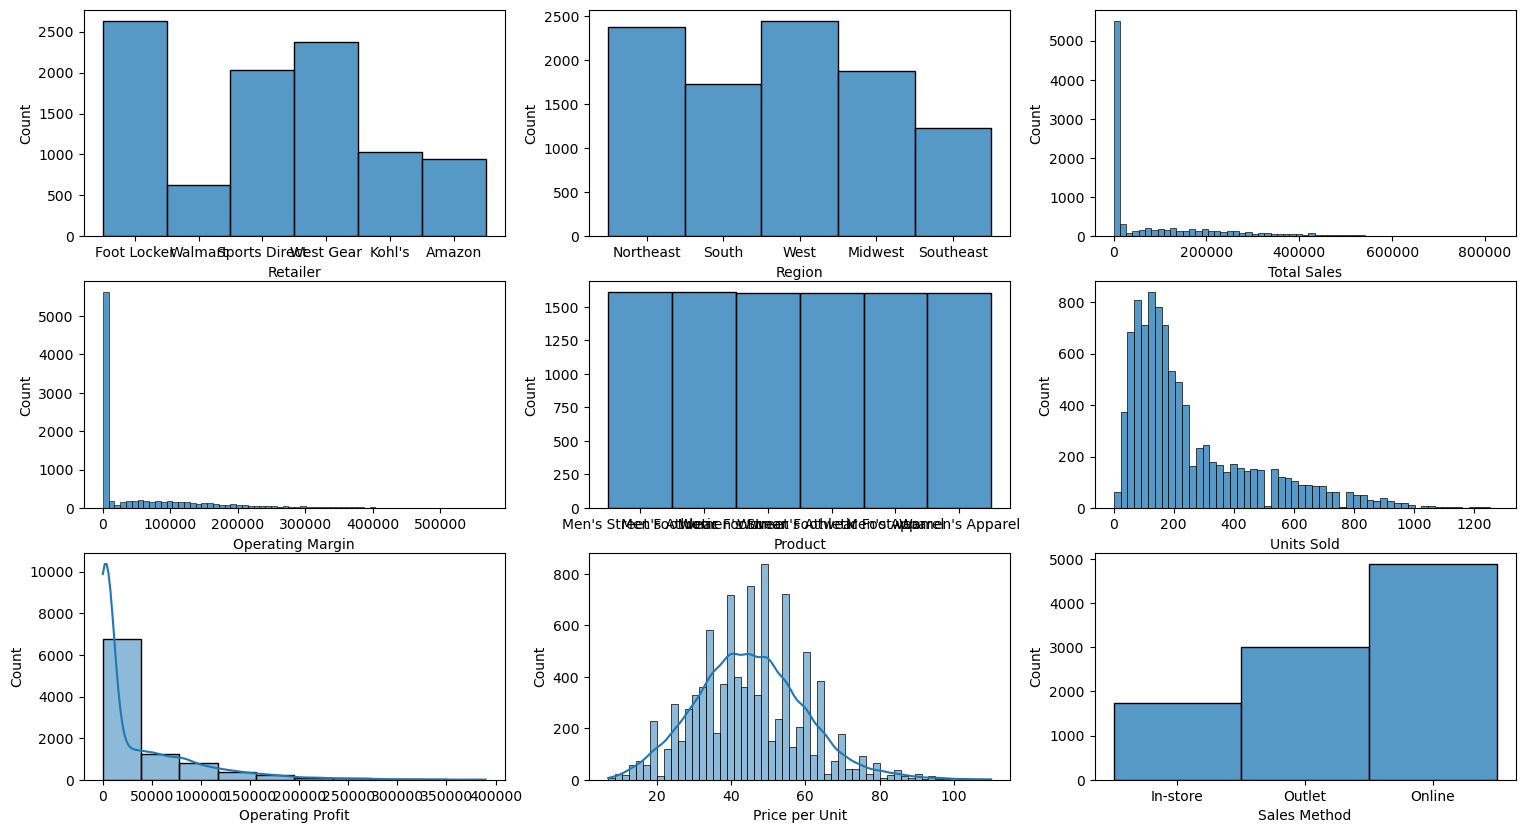

In [10]:
plt.figure(figsize = (25,10))


ax1 = plt.subplot2grid((3,4),(0,0))
sns.histplot(data['Retailer'])

ax1 = plt.subplot2grid((3,4),(0,1))
sns.histplot(data['Region'])

ax1 = plt.subplot2grid((3,4),(0,2))
sns.histplot(data['Total Sales'])

ax1 = plt.subplot2grid((3,4),(1,0))
sns.histplot(data['Operating Margin'])

ax1 = plt.subplot2grid((3,4),(1,1))
sns.histplot(data['Product'])

ax1 = plt.subplot2grid((3,4),(1,2))
sns.histplot(data['Units Sold'])

ax1 = plt.subplot2grid((3,4),(2,0))
sns.histplot(data['Operating Profit'], bins = 10, kde = True)

ax1 = plt.subplot2grid((3,4),(2,1))
sns.histplot(data['Price per Unit'], kde = True)

ax1 = plt.subplot2grid((3,4),(2,2))
sns.histplot(data['Sales Method'])

### HISTOGRAM OBSERVATIONS
1. Footlocker is the most frequent occuring retailer in the dataset
2. Total Sales, Operating profit, Operating Margin and Units Sold are interrelated and are **RIGHT SKEWED**
3. 'Price Per unit' is normally distributed.
4. Online sales are the highest
5. All products are more or less equally distributed
6. North east and West contribute to the most observed regions throughout the dataset

# Bi-variate Analysis

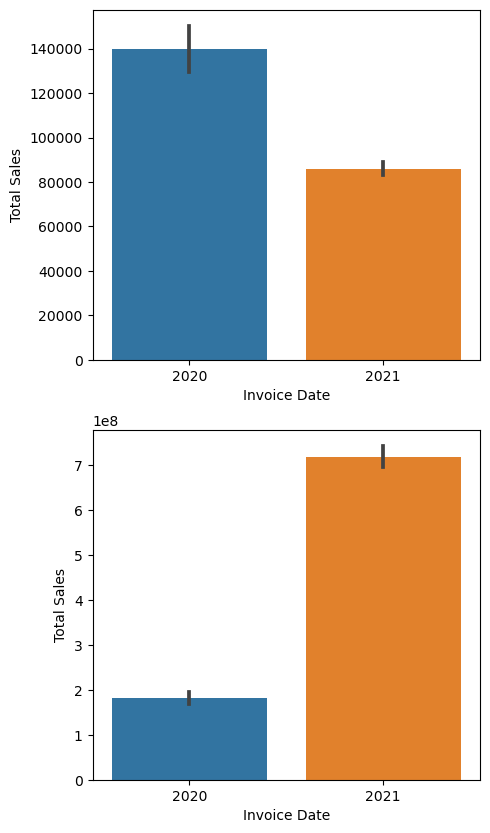

In [11]:
plt.figure(figsize = (5,10))

ax1 = plt.subplot2grid((2,1),(0,0))
sns.barplot(data = data, x = pd.DatetimeIndex(data['Invoice Date']).year, y = 'Total Sales')

ax1 = plt.subplot2grid((2,1),(1,0))
sns.barplot(data = data, x = pd.DatetimeIndex(data['Invoice Date']).year, y = 'Total Sales', estimator=sum)
plt.show()

<AxesSubplot:xlabel='Invoice Date', ylabel='Total Sales'>

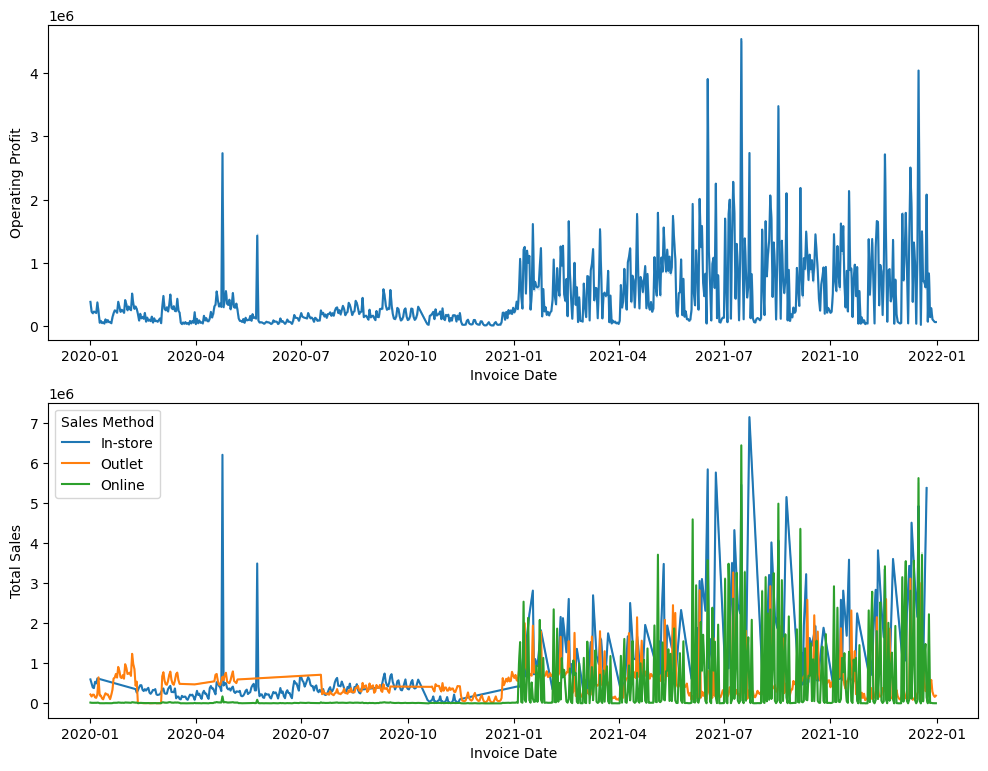

In [12]:
plt.figure(figsize = (12,9))

#Subplot Creation
ax1 = plt.subplot2grid((2,1),(0,0))
sns.lineplot(data = data, x = 'Invoice Date', y = 'Operating Profit', ci = False, estimator=sum)


ax1 = plt.subplot2grid((2,1),(1,0))
sns.lineplot(data = data, x = 'Invoice Date', y = 'Total Sales', ci = False, hue = 'Sales Method', estimator=sum)

### Plot 1
- Two irregular spikes between 04/2020 and 07/2020 through In-store sales is evident
- Proper increase in sales from 2021/01
- The profits stayed consistent post the dip with high spikes after 04/2021, Maximum Profit projected was September 2021
### Plot 2
- Introduction of online sales from 2021 resulted in the spike of Total Sales
- Total Sales from outlets is lowest out of all 3
- Significant increase in In-store sales from 2021
- Significant promotion/ all round sale improvement evident towards mid and end of 2021

[Text(0, 0, "Men's Athletic Footwear"),
 Text(1, 0, "Women's Street Footwear"),
 Text(2, 0, "Women's Athletic Footwear"),
 Text(3, 0, "Men's Apparel"),
 Text(4, 0, "Women's Apparel"),
 Text(5, 0, "Men's Street Footwear")]

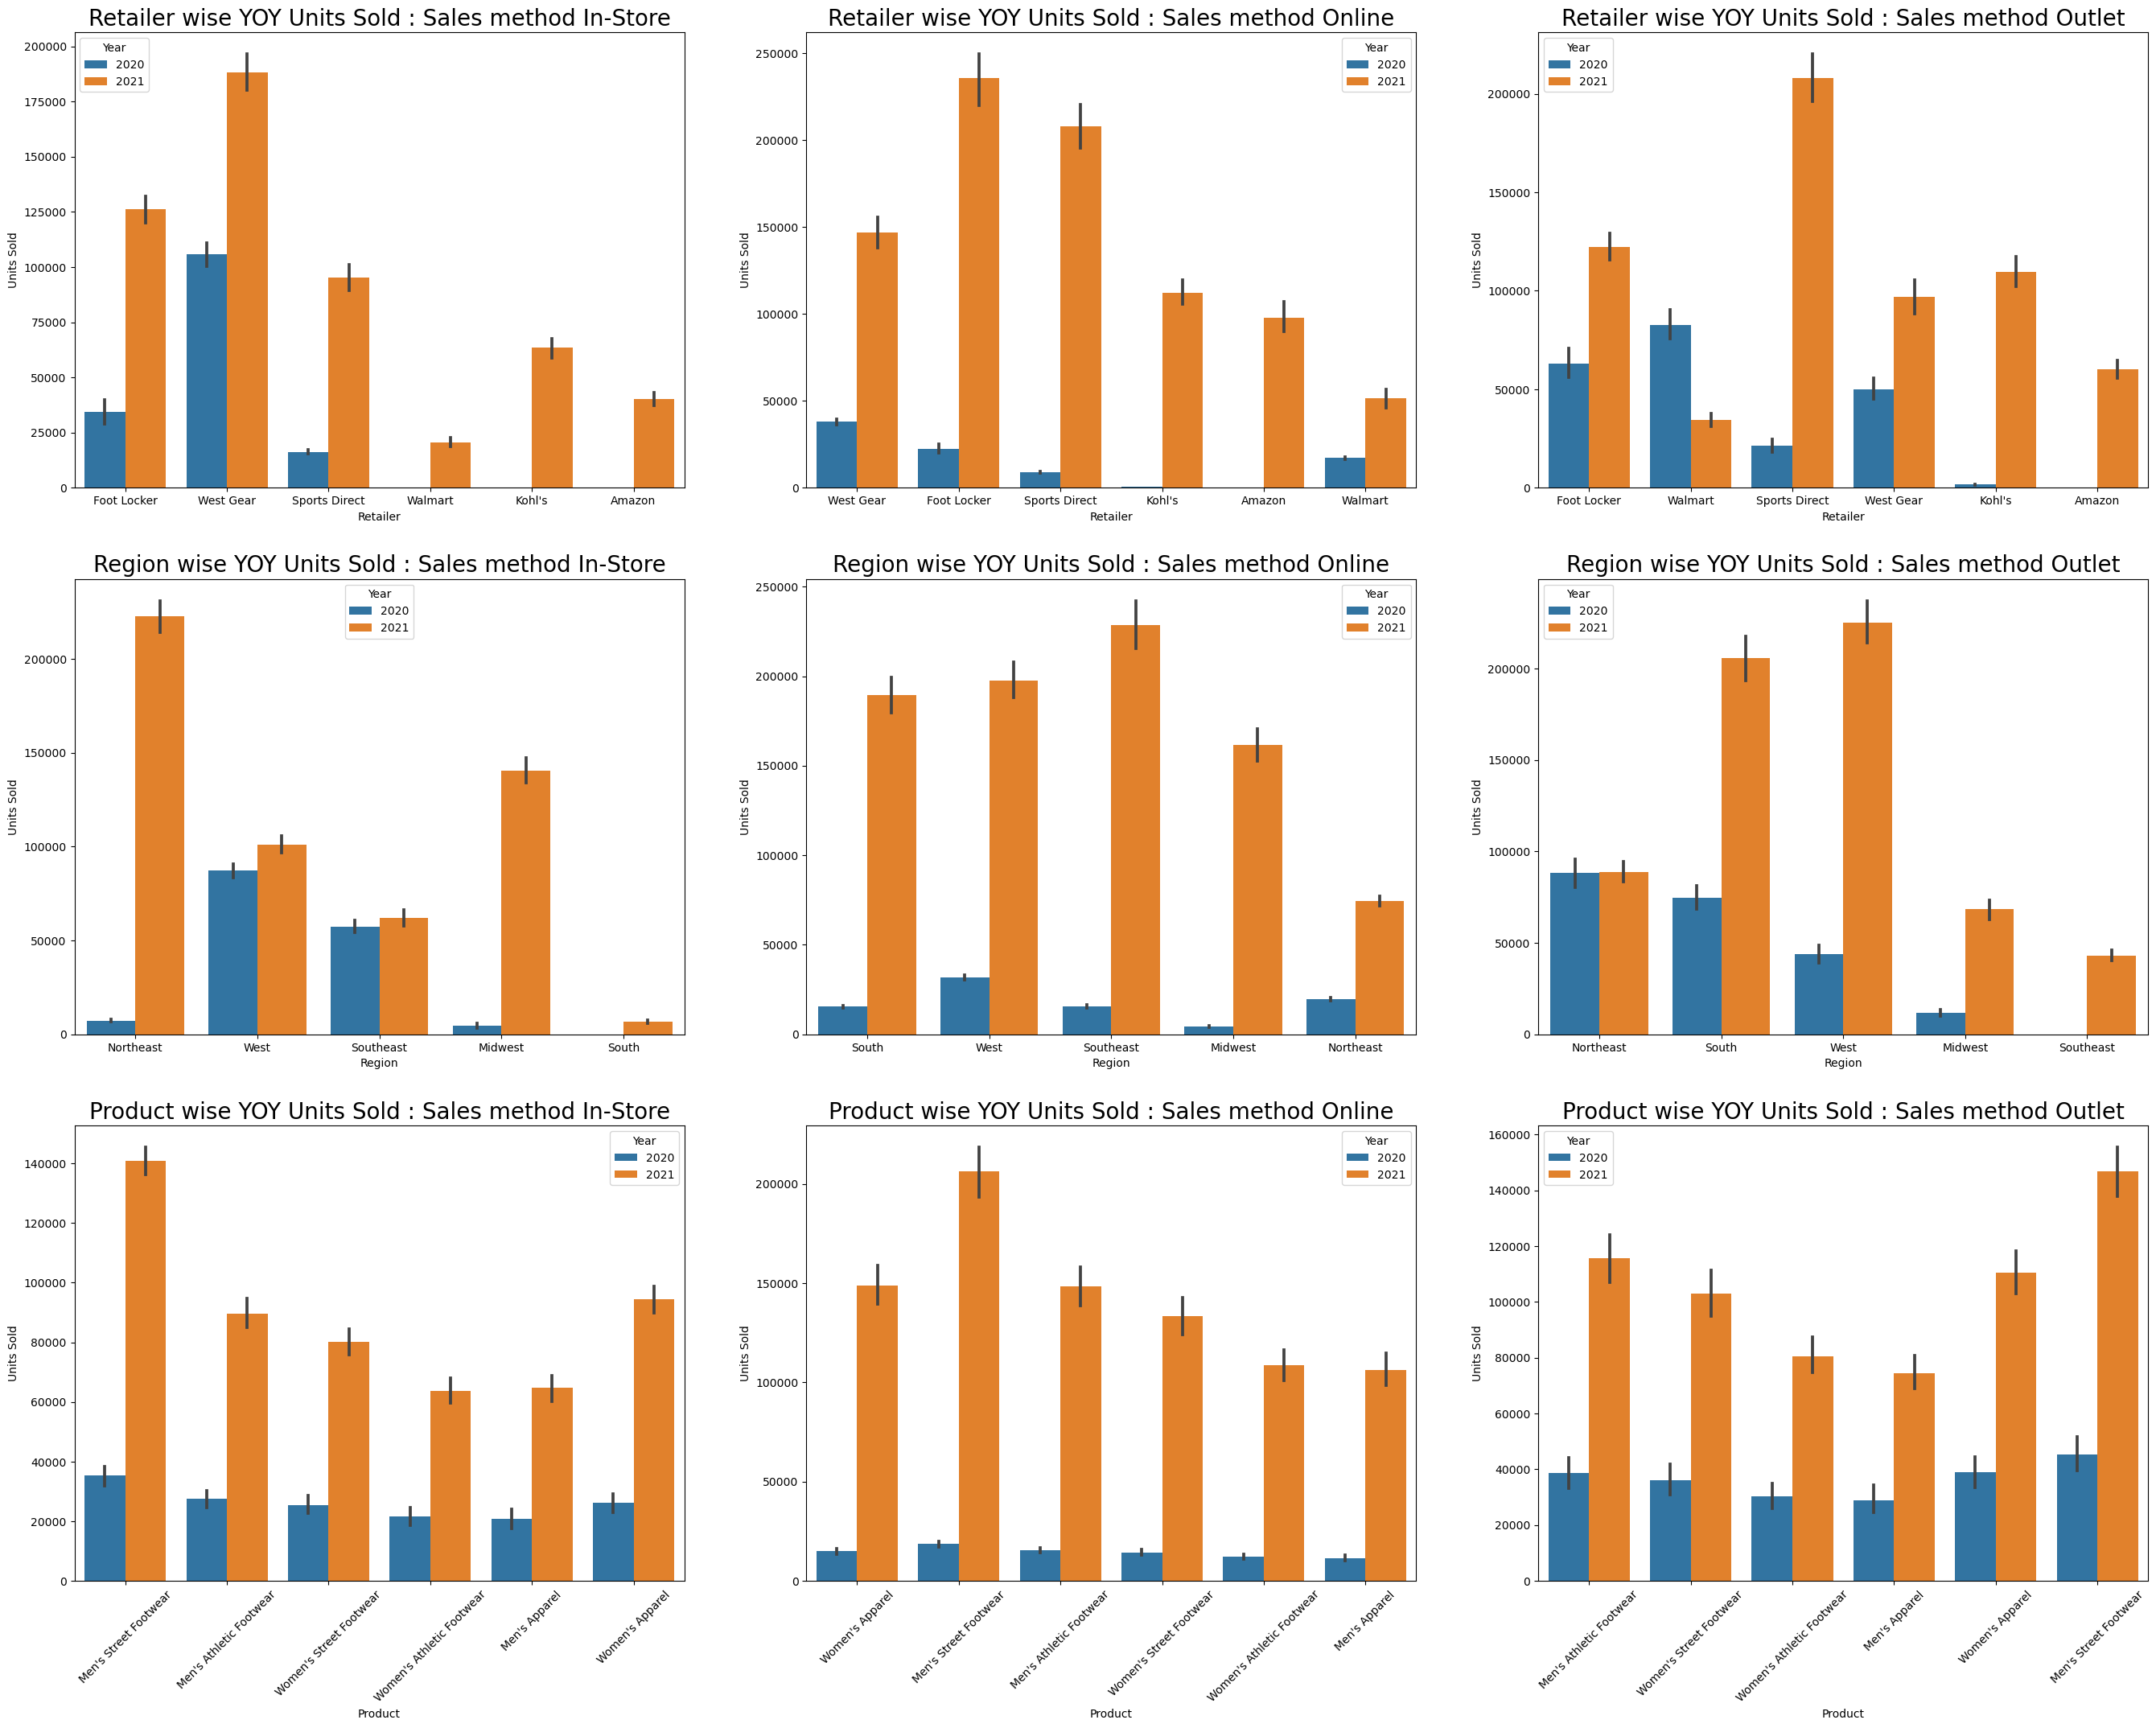

In [13]:
fig = plt.figure(figsize = (45,25))

#Subplot Creation
ax1 = plt.subplot2grid((3,4),(0,0))
sns.barplot(data = data[data['Sales Method'] == 'In-store'], x = 'Retailer',
            y = 'Units Sold',
            hue = 'Year',
            estimator=sum).set_title('Retailer wise YOY Units Sold : Sales method In-Store',fontdict={'size': 20})

ax1 = plt.subplot2grid((3,4),(0,1))
sns.barplot(data = data[data['Sales Method'] == 'Online'],
            x = 'Retailer',
            y = 'Units Sold',
            hue = 'Year',
            estimator=sum).set_title('Retailer wise YOY Units Sold : Sales method Online',fontdict={'size': 20})

ax1 = plt.subplot2grid((3,4),(0,2))
sns.barplot(data = data[data['Sales Method'] == 'Outlet'], x = 'Retailer',
            y = 'Units Sold',
            hue = 'Year',
            estimator=sum).set_title('Retailer wise YOY Units Sold : Sales method Outlet',fontdict={'size': 20})

ax1 = plt.subplot2grid((3,4),(1,0))
sns.barplot(data = data[data['Sales Method'] == 'In-store'], x = 'Region',
            y = 'Units Sold',
            hue = 'Year',
            estimator=sum).set_title('Region wise YOY Units Sold : Sales method In-Store',fontdict={'size': 20})

ax1 = plt.subplot2grid((3,4),(1,1))
sns.barplot(data = data[data['Sales Method'] == 'Online'],
            x = 'Region',
            y = 'Units Sold',
            hue = 'Year',
            estimator=sum).set_title('Region wise YOY Units Sold : Sales method Online',fontdict={'size': 20})

ax1 = plt.subplot2grid((3,4),(1,2))
sns.barplot(data = data[data['Sales Method'] == 'Outlet'], x = 'Region',
            y = 'Units Sold',
            hue = 'Year',
            estimator=sum).set_title('Region wise YOY Units Sold : Sales method Outlet',fontdict={'size': 20})

ax1 = plt.subplot2grid((3,4),(2,0))
sns.barplot(data = data[data['Sales Method'] == 'In-store'], x = 'Product',
            y = 'Units Sold',
            hue = 'Year', 
            estimator=sum).set_title('Product wise YOY Units Sold : Sales method In-Store',fontdict={'size': 20})
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="center")

ax1 = plt.subplot2grid((3,4),(2,1))
sns.barplot(data = data[data['Sales Method'] == 'Online'],
            x = 'Product',
            y = 'Units Sold',
            hue = 'Year',
            estimator=sum).set_title('Product wise YOY Units Sold : Sales method Online',fontdict={'size': 20})
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="center")


ax1 = plt.subplot2grid((3,4),(2,2))
sns.barplot(data = data[data['Sales Method'] == 'Outlet'], x = 'Product',
            y = 'Units Sold',
            hue = 'Year',
            estimator=sum).set_title('Product wise YOY Units Sold : Sales method Outlet',fontdict={'size': 20})

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="center")


## In-store sales- Retailer wise
- West Gear and Foot Locker improved their In-Store sales significantly and maintained their lead in 2021 as well
- Walmart, Kohl's and Amazon also initiated in-store sales in 2021


## Online sales - Retailer wise
- Online Sales via 'Amazon' was started in the year 2021. Kohl's had a massive increase in Online sales as well
- Each Retailer have seen an enormous increase in online sales in 2021 vs 2020. 
- Foot Locker is leading Retailer followed by Sports Direct at the end of 2021 in Online Sales.


## Outlet sales - Retailer wise
- Sports Direct had a massive increase in sales from outlet and is maintaining lead by 2021 among all Retailers
- Walmart is the only retailer which projected less outlet sales in 2021 vs 2020

# -----------------------------------------------------------------------------------------------------------
## In-store sales - Region wise
- Massive improvement in Sales is evident in Northeast and Midwest in 2021.
- West and Southeast region are having comparatively less sales growth in 2021.
- Instore Sales have started in 2021, though is considerable smaller then all other regions.


## Online sales - Region wise
- Each region has grown considerably in Online Sales in 2021 v/s 2020
- Southeast has replaced West and taken lead role in 2021
- South has taken challanger position in 2021 replacing Northeast.


## Outlet sales - Region wise
- Northeast was leading region in 2020 followed by South for Outlet sales whereas West followed by South have taken lead in 2021
- Northeast has almost no growth in sold qty whereas all other regions showed growth in unit sold in 2021
- Southeast Outlets sales started in 2021

# -----------------------------------------------------------------------------------------------------------
## Instore - Product wise
- All products were getting sold and grown in both year. No new Product introduction or removal in 2021.
- Men's Street footware has grown considerably larger followed byu Women's Appareal

## Online - Product wise
- Among all products, Men's Street Footware has grown considerably in 2021
- All products have grown their sales through Online mode in 2021.

## Outlet - Product wise
- All products were having almost unified Outlet presence in 2020, but in 2021 Men's Street Footware was most appealing 
- Men's Athletic Footware and Women's Apparels were having almost equal sales in 2021

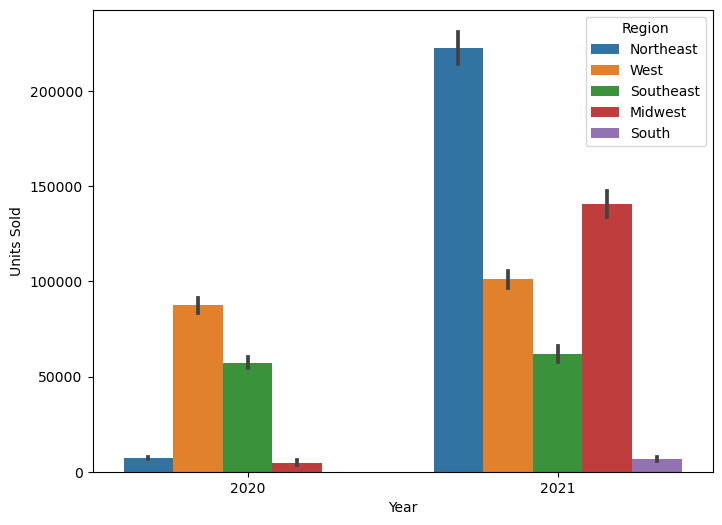

In [14]:
plt.figure(figsize = (8, 6))
sns.barplot(data = data[(data['Sales Method'] == 'In-store')], x = 'Year', y = 'Units Sold', hue = 'Region', estimator=sum)
plt.show()

Text(0.5, 1.0, 'Region wise Units Sold : Sales method Outlet')

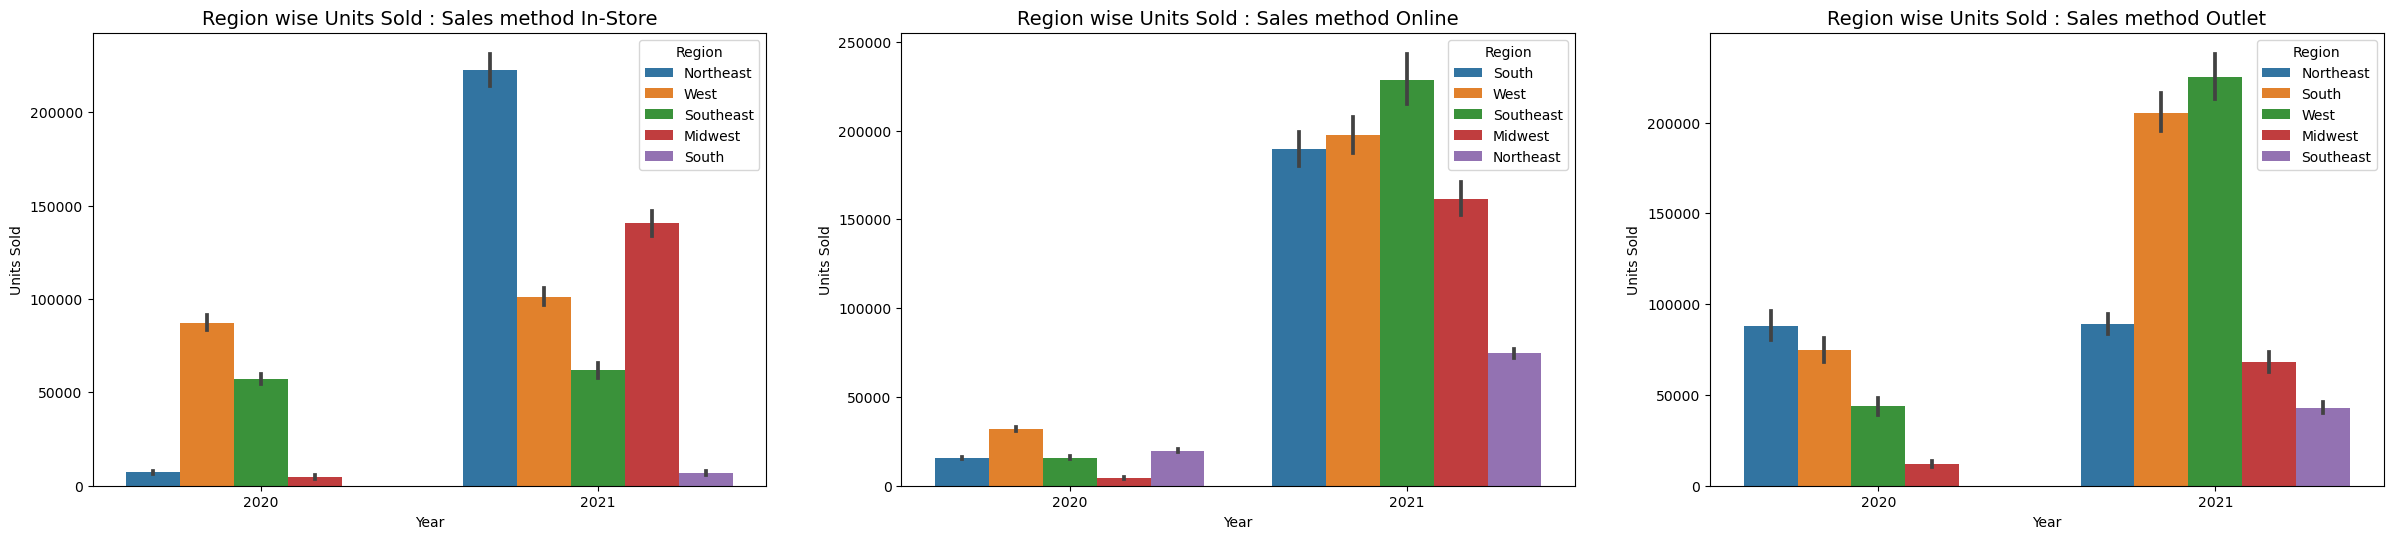

In [15]:
fig = plt.figure(figsize = (40,20))

#Subplot Creation
ax1 = plt.subplot2grid((3,4),(0,0))
sns.barplot(data = data[(data['Sales Method'] == 'In-store')], x = 'Year', y = 'Units Sold', hue = 'Region', estimator=sum).set_title('Region wise Units Sold : Sales method In-Store',fontdict={'size': 14})

ax1 = plt.subplot2grid((3,4),(0,1))
sns.barplot(data = data[(data['Sales Method'] == 'Online')], x = 'Year', y = 'Units Sold', hue = 'Region', estimator=sum).set_title('Region wise Units Sold : Sales method Online',fontdict={'size': 14})

ax1 = plt.subplot2grid((3,4),(0,2))
sns.barplot(data = data[(data['Sales Method'] == 'Outlet')], x = 'Year', y = 'Units Sold', hue = 'Region', estimator=sum).set_title('Region wise Units Sold : Sales method Outlet',fontdict={'size': 14})



Instore Sales
- 2020 consisted of 4 regions whereas 2021 consisted of 5 regions 
- South has been introduced in 2021
- Significant increase in the Northeast and Midwest region, almost negligible increase in Southeast

Online Sales
- All regions gained business through Online Sales
- Southeast gained most units sold

Outlet Sales
- Southeast introduced Outlet sales in 2021
- West got maximum Outlet sale gain in 2021
- Northeast didnt gained any sales in 2021

[Text(0, 0, "Men's Athletic Footwear"),
 Text(1, 0, "Women's Street Footwear"),
 Text(2, 0, "Women's Athletic Footwear"),
 Text(3, 0, "Men's Apparel"),
 Text(4, 0, "Women's Apparel"),
 Text(5, 0, "Men's Street Footwear")]

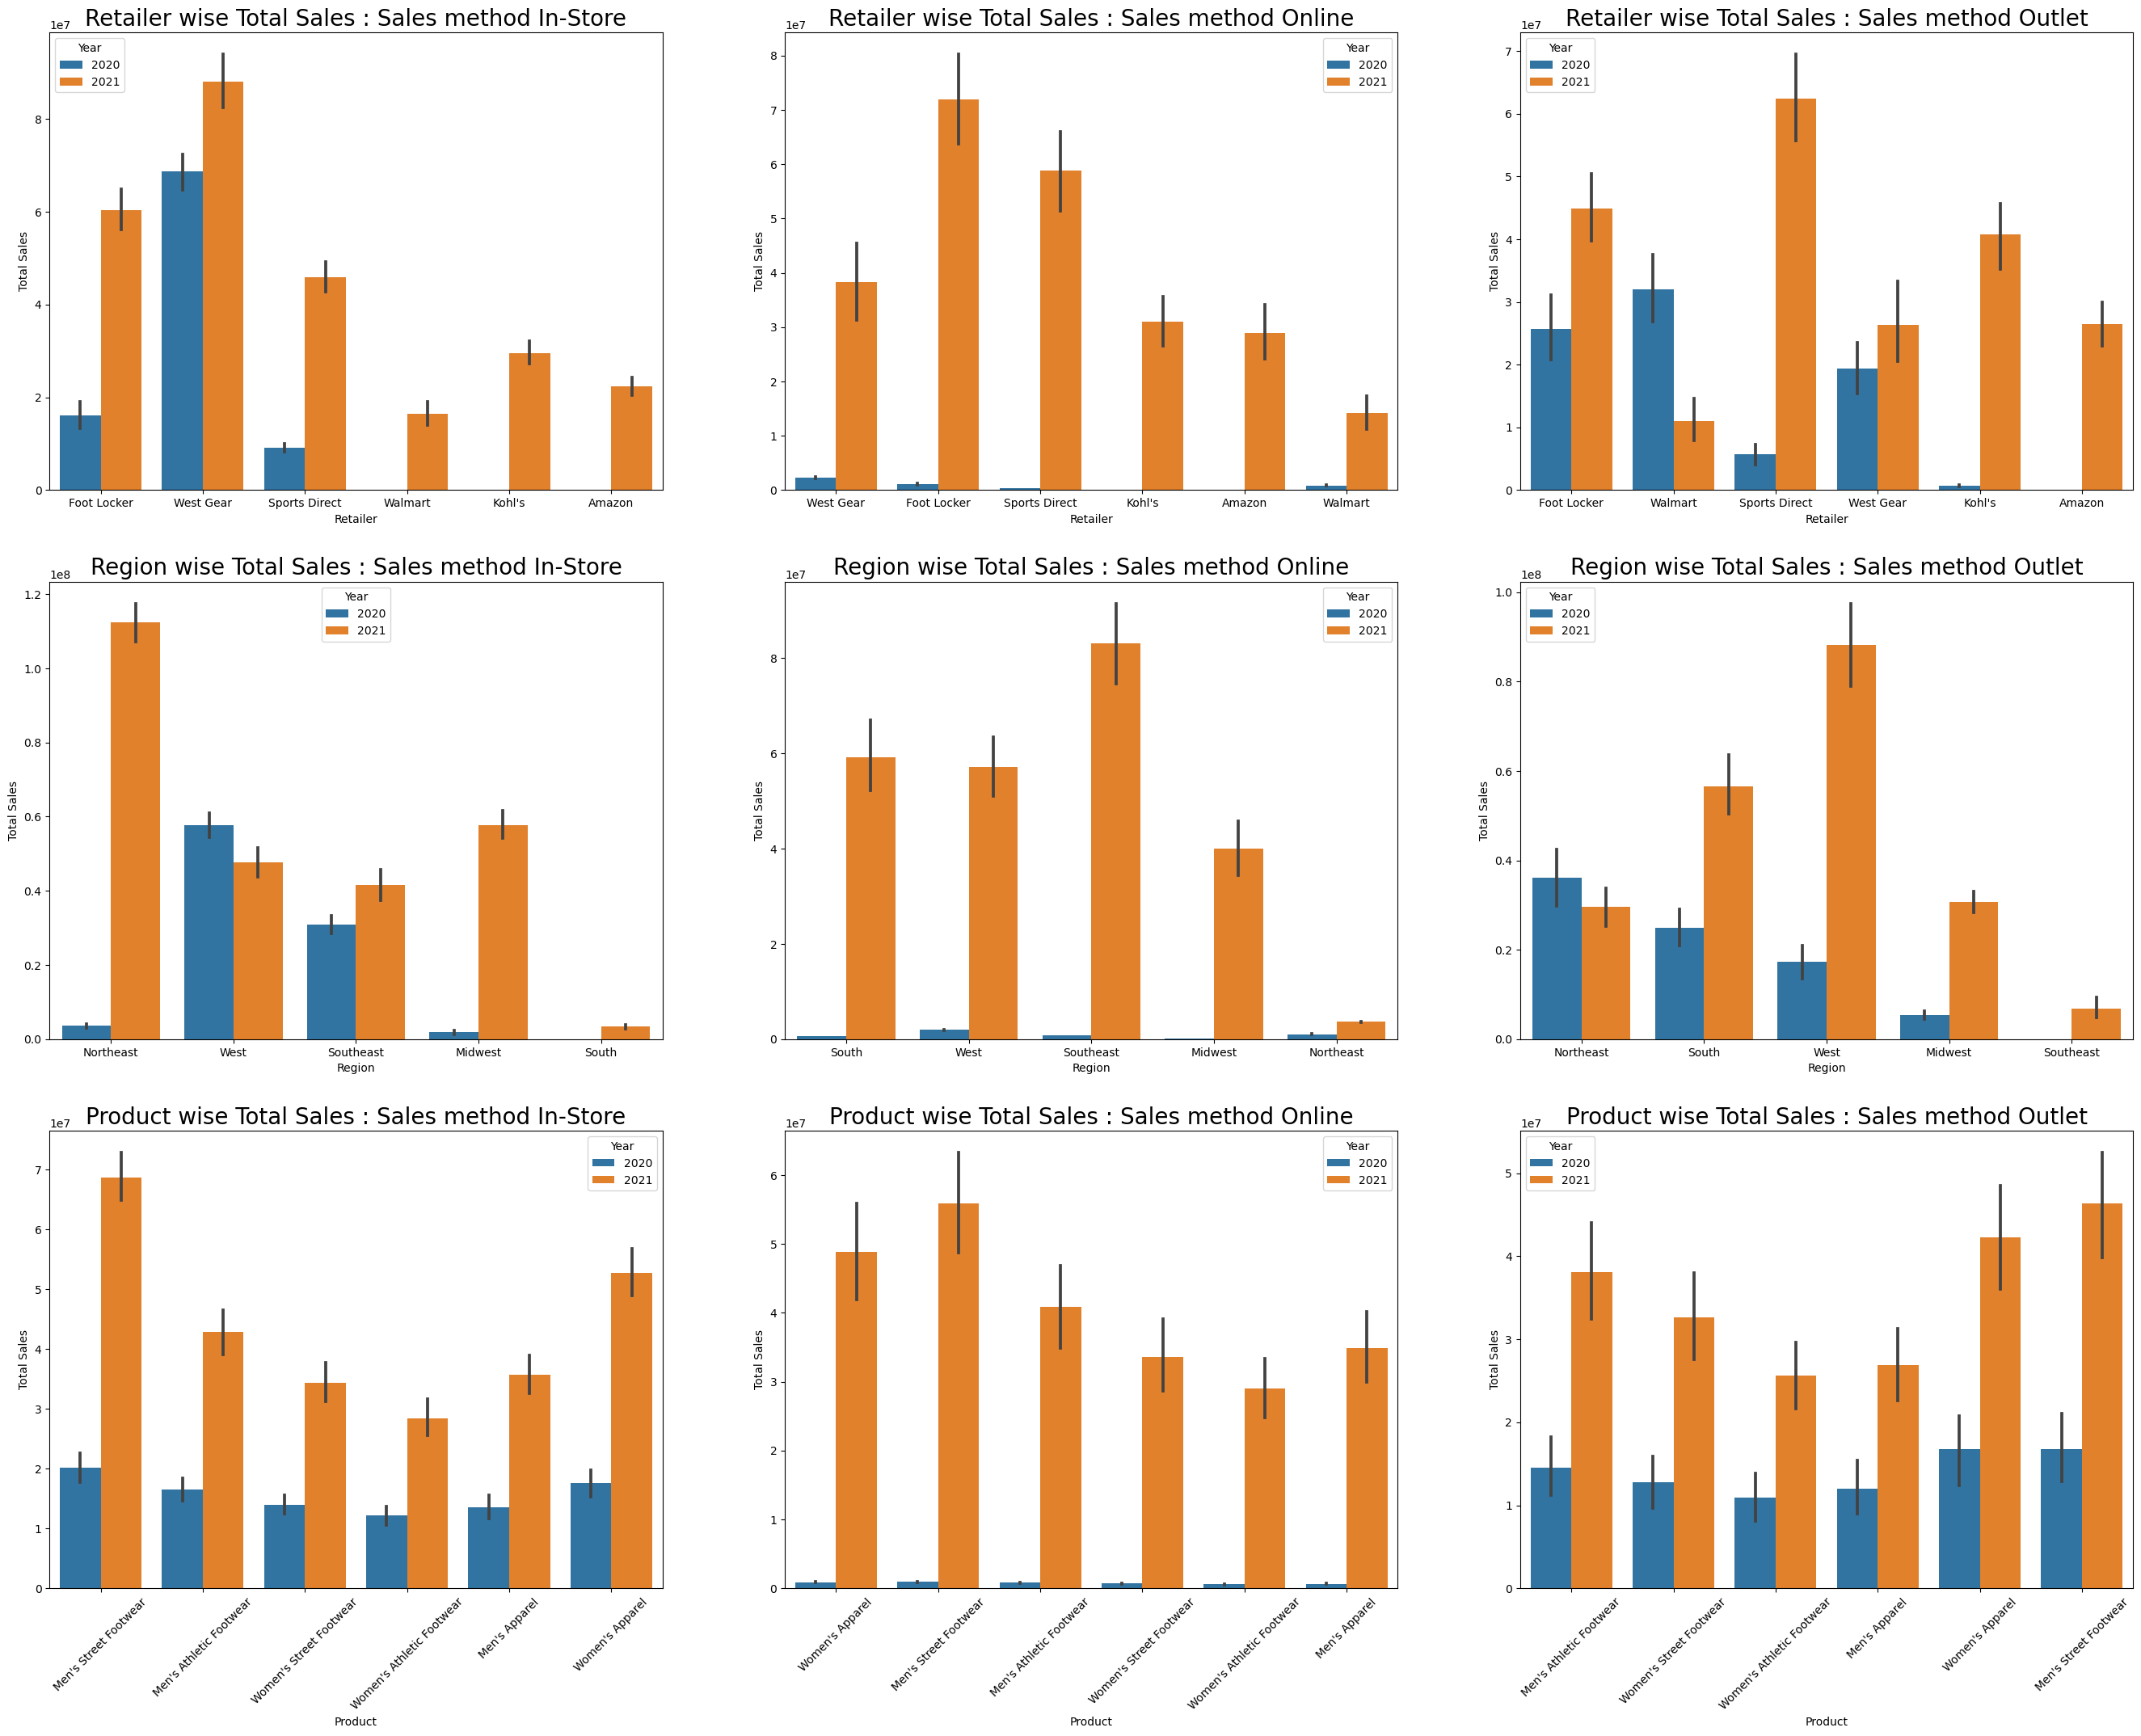

In [16]:
fig = plt.figure(figsize = (45,25))

#Subplot Creation
ax1 = plt.subplot2grid((3,4),(0,0))
sns.barplot(data = data[data['Sales Method'] == 'In-store'], x = 'Retailer',
            y = 'Total Sales',
            hue = 'Year',
            estimator=sum).set_title('Retailer wise Total Sales : Sales method In-Store',fontdict={'size': 20})

ax1 = plt.subplot2grid((3,4),(0,1))
sns.barplot(data = data[data['Sales Method'] == 'Online'],
            x = 'Retailer',
            y = 'Total Sales',
            hue = 'Year',
            estimator=sum).set_title('Retailer wise Total Sales : Sales method Online',fontdict={'size': 20})

ax1 = plt.subplot2grid((3,4),(0,2))
sns.barplot(data = data[data['Sales Method'] == 'Outlet'], x = 'Retailer',
            y = 'Total Sales',
            hue = 'Year',
            estimator=sum).set_title('Retailer wise Total Sales : Sales method Outlet',fontdict={'size': 20})

ax1 = plt.subplot2grid((3,4),(1,0))
sns.barplot(data = data[data['Sales Method'] == 'In-store'], x = 'Region',
            y = 'Total Sales',
            hue = 'Year',
            estimator=sum).set_title('Region wise Total Sales : Sales method In-Store',fontdict={'size': 20})

ax1 = plt.subplot2grid((3,4),(1,1))
sns.barplot(data = data[data['Sales Method'] == 'Online'],
            x = 'Region',
            y = 'Total Sales',
            hue = 'Year',
            estimator=sum).set_title('Region wise Total Sales : Sales method Online',fontdict={'size': 20})

ax1 = plt.subplot2grid((3,4),(1,2))
sns.barplot(data = data[data['Sales Method'] == 'Outlet'], x = 'Region',
            y = 'Total Sales',
            hue = 'Year',
            estimator=sum).set_title('Region wise Total Sales : Sales method Outlet',fontdict={'size': 20})

ax1 = plt.subplot2grid((3,4),(2,0))
sns.barplot(data = data[data['Sales Method'] == 'In-store'], x = 'Product',
            y = 'Total Sales',
            hue = 'Year', 
            estimator=sum).set_title('Product wise Total Sales : Sales method In-Store',fontdict={'size': 20})
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="center")

ax1 = plt.subplot2grid((3,4),(2,1))
sns.barplot(data = data[data['Sales Method'] == 'Online'],
            x = 'Product',
            y = 'Total Sales',
            hue = 'Year',
            estimator=sum).set_title('Product wise Total Sales : Sales method Online',fontdict={'size': 20})
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="center")


ax1 = plt.subplot2grid((3,4),(2,2))
sns.barplot(data = data[data['Sales Method'] == 'Outlet'], x = 'Product',
            y = 'Total Sales',
            hue = 'Year',
            estimator=sum).set_title('Product wise Total Sales : Sales method Outlet',fontdict={'size': 20})

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="center")

Instore Sales: Walmart, Kohl's and Amazon also initiated in 2021. Existing players took lead in 2021 as well. 
Outlet sales: Walmart sale dropped and Sports direct gained the most in 2021. Kohl’s became 3rd largest retailer. Amazon started sales in 2021.
Online Sales: Growth by all players in 2021, Amazon started in 2021. 

Instore sales: Northeast and Midwest gained the most & Southeast was not growing much, West sale dropped.
Outlet Sales: Northeast sale dropped, South east started and West and South gained the most.
Online sales: Growth in all regions. Max gain by Southeast, South, West and Midwest

Product story: Almost unified sale for all products in 2020 in all sales methods. Men's Street footware, Women’s Appareal and Men’s Athletic footware have grown in all  considerably in 2021 


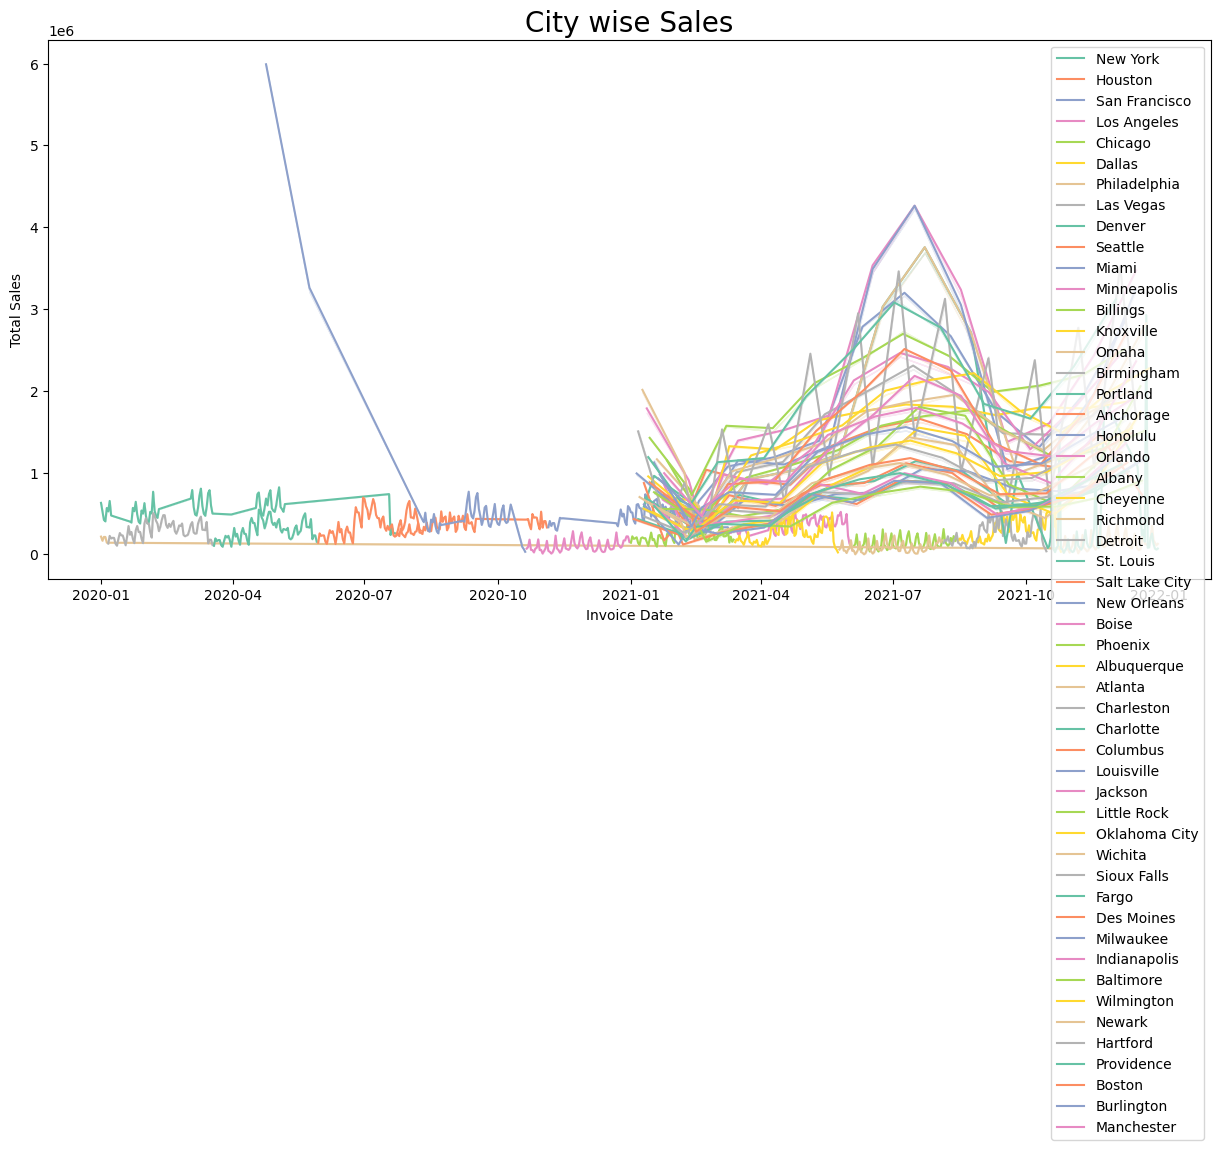

In [17]:
plt.figure(figsize = (15,7))
sns.lineplot(data = data,
             x = 'Invoice Date',
             y = 'Total Sales',
             hue = 'City',
             ci = False,
            palette = 'Set2', estimator=sum).set_title('City wise Sales', fontdict={'size': 20})
plt.legend(loc='upper right')
plt.show()

## Observation
- Few cities in different regions had stints where sales were being made towards in the year 2020
- From Jan 2021, there was a massive influx in number of cities the sales were recorded from 
- Online purchase is visibly increasing share in Retailer wise, Region wise and Product wise in 2021

In [18]:
# Top Products
top_products= data[['Product','Total Sales']].groupby('Product').sum()
top_products

Total Sales
Product                               
Men's Apparel              123728632.0
Men's Athletic Footwear    153673680.0
Men's Street Footwear      208826244.0
Women's Apparel            179038860.0
Women's Athletic Footwear  106631896.0
Women's Street Footwear    128002813.0

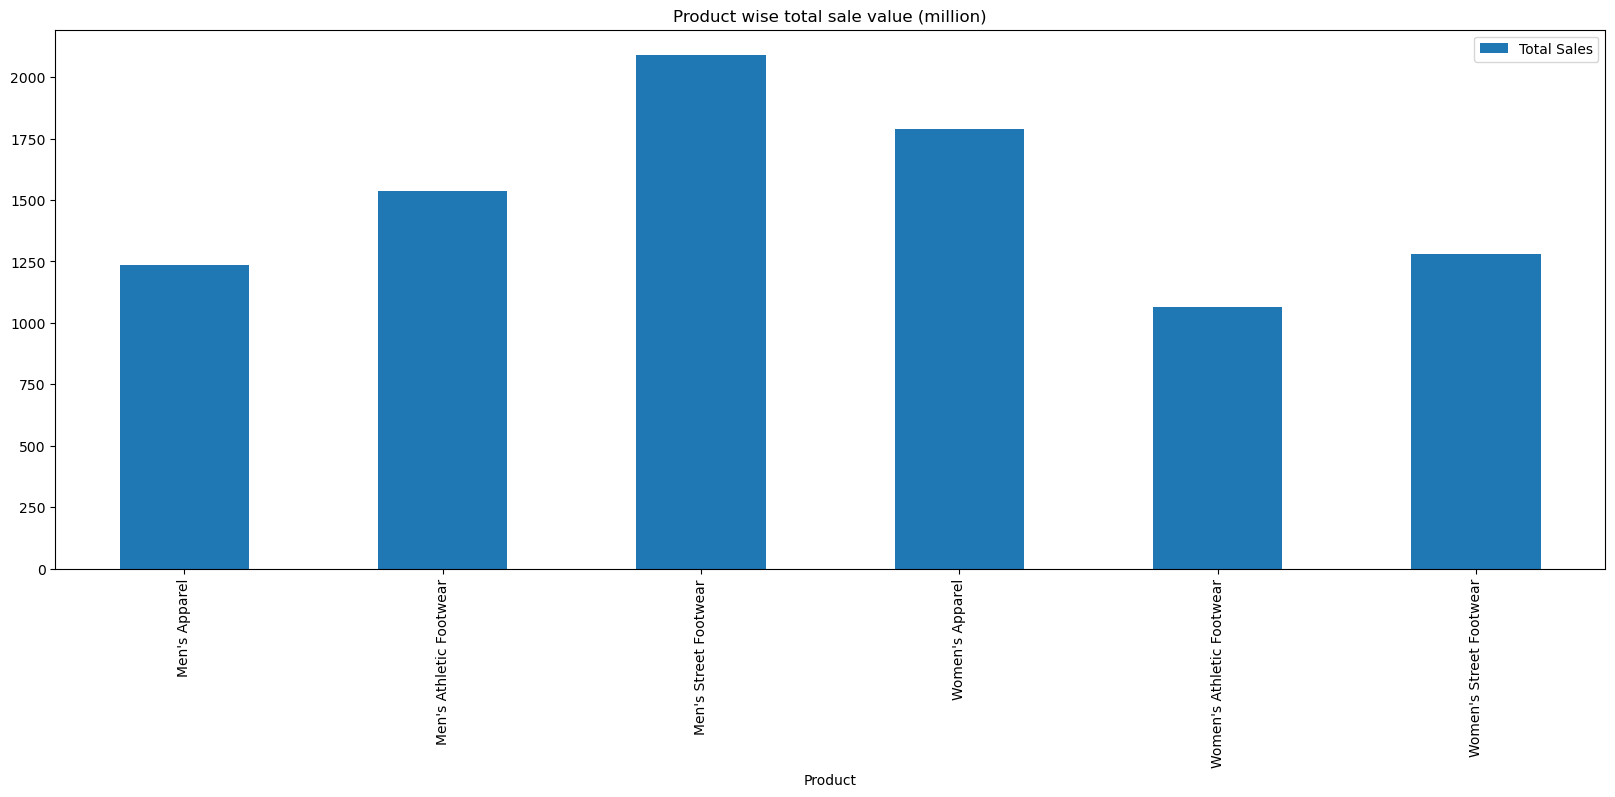

In [19]:
(top_products/100000).plot(kind='bar',figsize=(20,7),title='Product wise total sale value (million)')
plt.show()

In [20]:
# Top Retailer
top_Retailer= data[['Retailer','Total Sales']].groupby('Retailer').sum()
top_Retailer

Total Sales
Retailer                  
Amazon          77698912.0
Foot Locker    220094720.0
Kohl's         102114753.0
Sports Direct  182470997.0
Walmart         74558410.0
West Gear      242964333.0

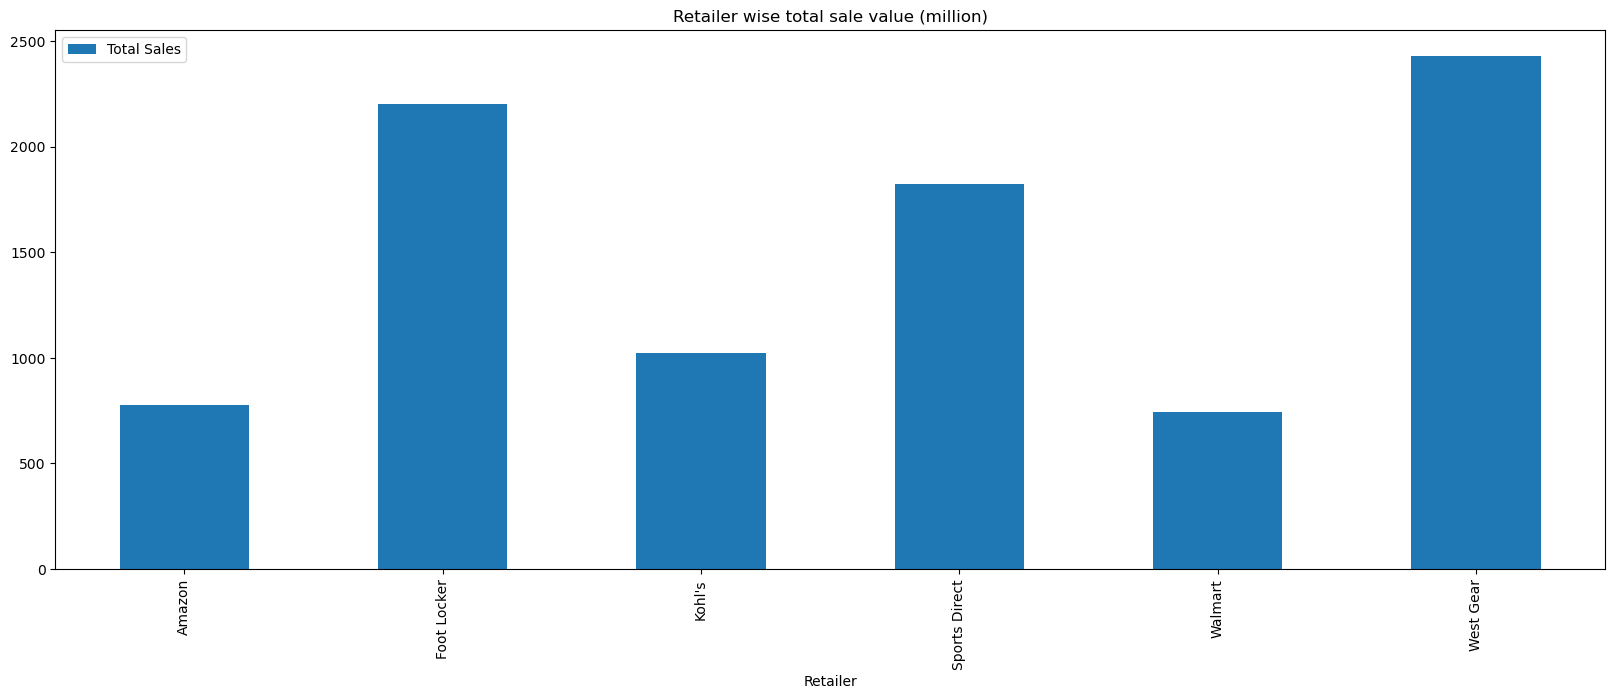

In [21]:
(top_Retailer/100000).plot(kind='bar',figsize=(20,7),title='Retailer wise total sale value (million)')
plt.show()

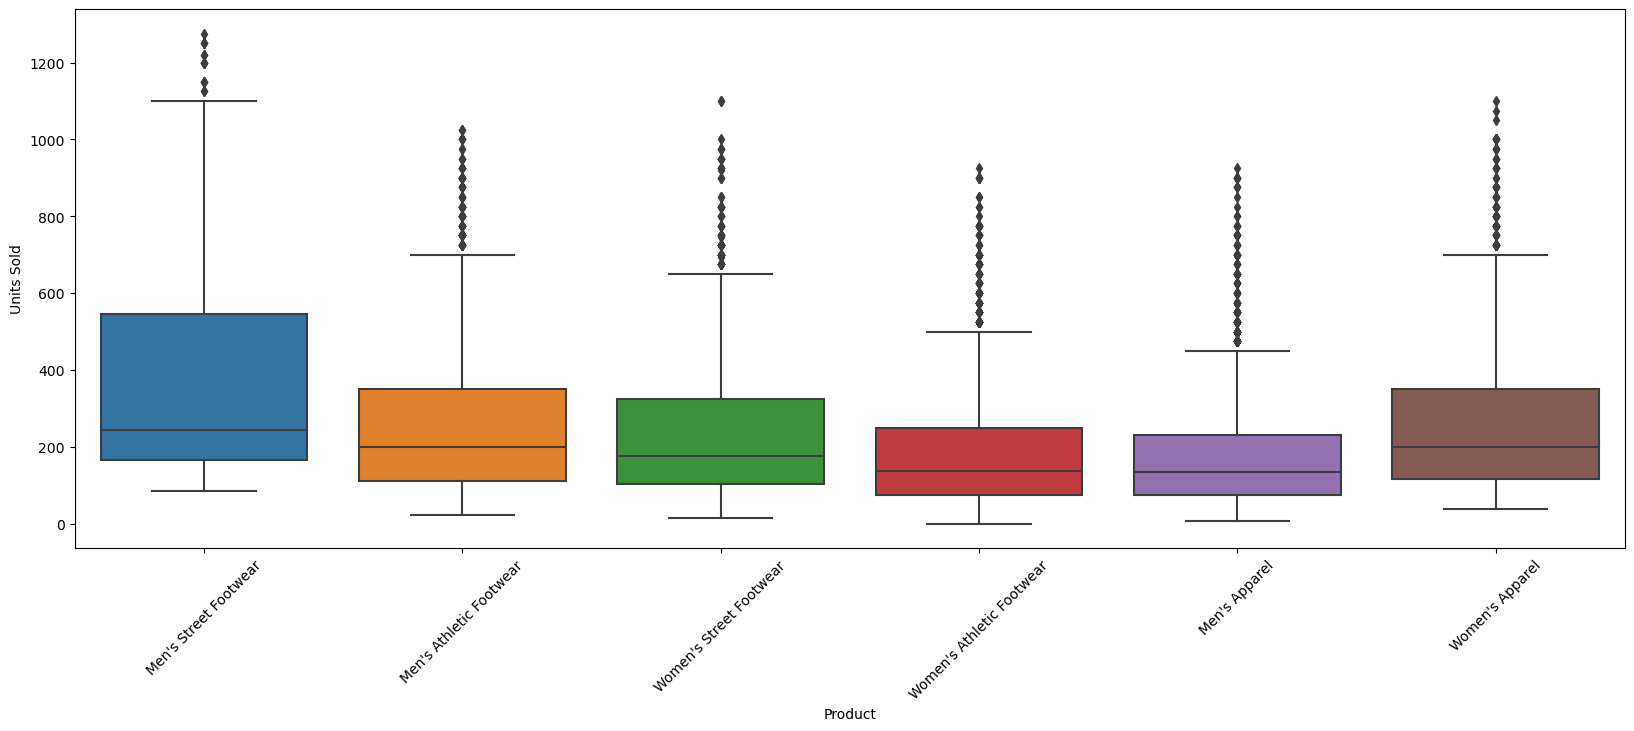

In [22]:
plt.figure(figsize = (20,7))
ax1 = sns.boxplot(data=data, x='Product', y='Units Sold') 
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="center") ;

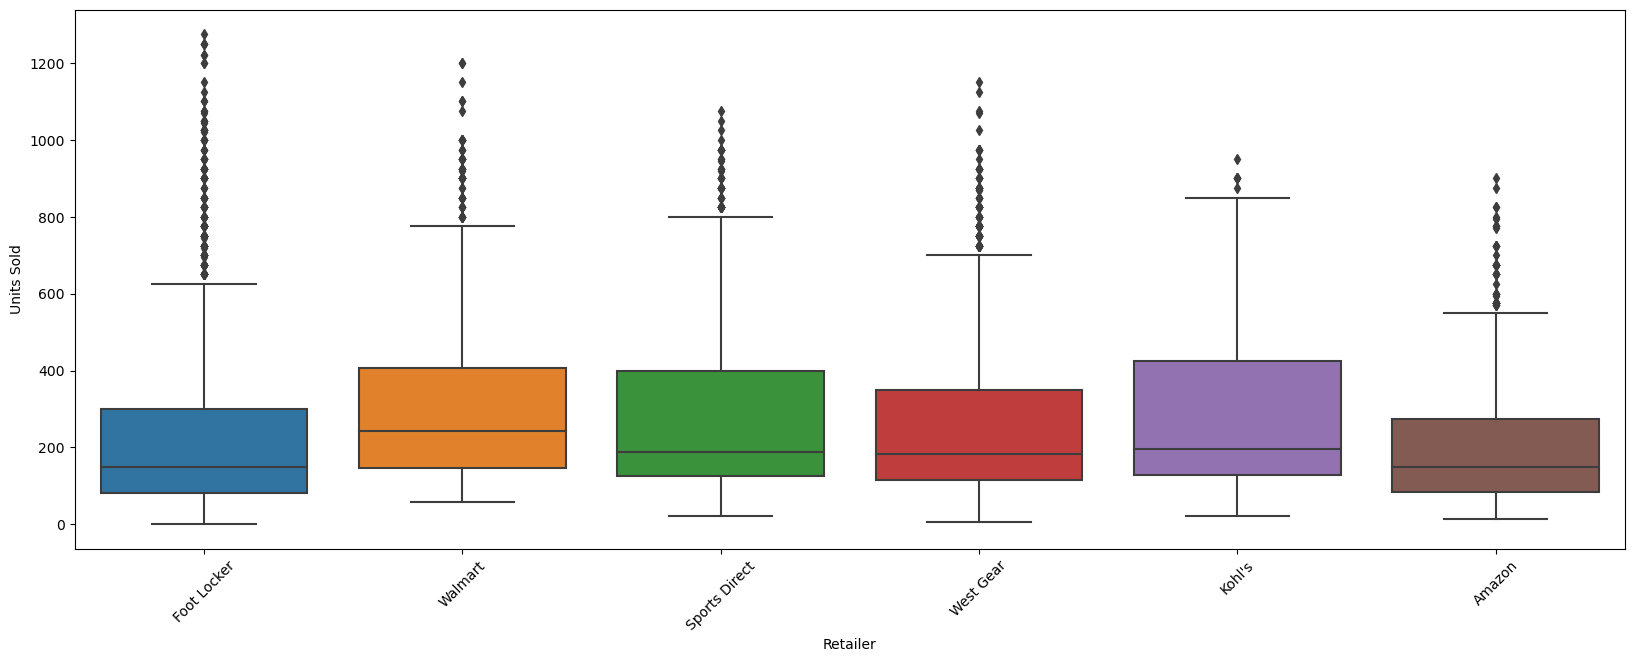

In [23]:
plt.figure(figsize = (20,7))
ax1 = sns.boxplot(data=data, x='Retailer', y='Units Sold') 
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="center") ;

# CORRELATION

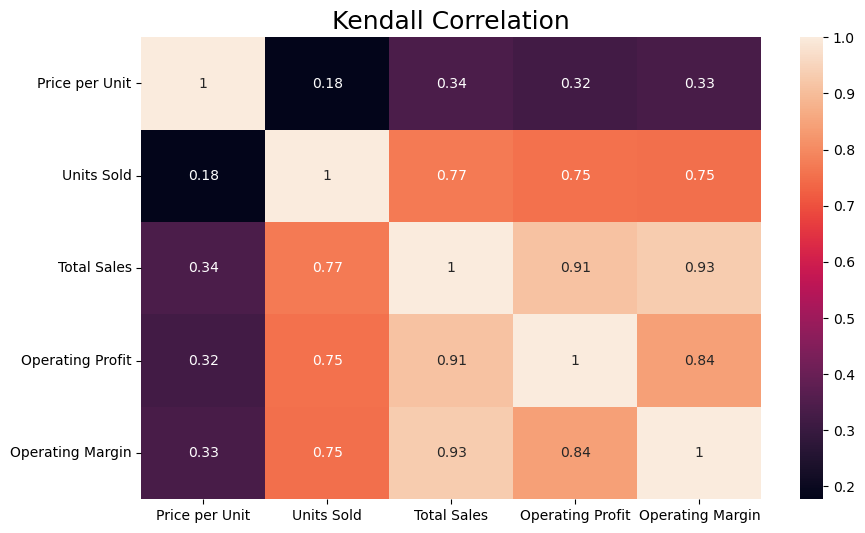

In [24]:
correlationData = data[['Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin']]
correlation = correlationData.corr(method='kendall')
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True)
plt.title('Kendall Correlation', size=18)
plt.show()

# KEY TAKEAWAYS FROM EDA

1. Total Sales, Operating profit and Units Sold are interrelated and are **RIGHT SKEWED** AND 'Price Per unit' is normally distributed
2. 2021 has seen sudden spike in the Sales and Total sales due to the introduction of sales in a lot more cities.
3. Opening up online platform for sales gained a high influx of overall sales
4. A new region - 'South' was introduced in the year 2021
5. Kohl's, Walmart and Amazon also introduced 'In-store' sales in 2021


# CLUSTERING

# 1. K-means

## Min-Max Scaler

In [25]:
# Omitting string columns
clusterData1 = data[['Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin']]
clusterData1.head(2)

#SCALING USING MINMAXSCALER
from sklearn.preprocessing import MinMaxScaler
minMax = MinMaxScaler()
minMaxData = pd.DataFrame(minMax.fit_transform(clusterData1),columns = minMax.feature_names_in_)
minMaxData.head(2)

inertia = []
for i in range(1,11):
    kmeans = KMeans(
        n_clusters=i, init="k-means++",
        n_init=10, random_state=42
    )
    kmeans.fit(minMaxData)
    inertia.append(kmeans.inertia_)
fig = go.Figure(data=go.Scatter(x=np.arange(1,11),y=inertia))
fig.update_layout(title="Inertia vs Cluster Number",xaxis=dict(range=[0,11],title="Cluster Number"),
                  yaxis={'title':'Inertia'})

In [26]:
from sklearn.cluster import KMeans
kMeansClustering = KMeans(n_clusters = 3)
kMeansClustering.fit(minMaxData)
#clusterData1['Clusters'] = kMeansClustering.predict(minMaxData)
clusterPred = pd.DataFrame(kMeansClustering.predict(minMaxData))
minMaxClusters = pd.concat([clusterData1.loc[:],clusterPred], axis = 1)
minMaxClusters.rename(columns = {0:'Clusters'}, inplace = True)
minMaxClusters



## PLOTTING THE CLUSTERS
mmClustersScaled = pd.concat([minMaxData.loc[:],clusterPred], axis = 1)
mmClustersScaled.rename(columns = {0:'Clusters'}, inplace = True)
polar=mmClustersScaled.groupby("Clusters").mean().reset_index()
polar=pd.melt(polar,id_vars=["Clusters"])
fig = px.line_polar(polar, r="value", theta="variable", color="Clusters", line_close=True)
fig.show()

C:\Users\anujn\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\anujn\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\anujn\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



## Standard Scalar

In [27]:
clusterData2 = data[['Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin']]


#Importing StandardScalar
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
standardScaledData = pd.DataFrame(standardScaler.fit_transform(clusterData2), columns = standardScaler.feature_names_in_)
standardScaledData.head(2)


#Plotting the Elbow curve
from sklearn.cluster import KMeans
import plotly.graph_objects as go
inertia = []
for i in range(1,11):
    kmeans = KMeans(
        n_clusters=i, init="k-means++",
        n_init=10, random_state=42
    )
    kmeans.fit(standardScaledData)
    inertia.append(kmeans.inertia_)
fig = go.Figure(data=go.Scatter(x=np.arange(1,11),y=inertia))
fig.update_layout(title="Inertia vs Cluster Number",xaxis=dict(range=[0,11],title="Cluster Number"),
                  yaxis={'title':'Inertia'})


In [28]:
#Creating clusters using K-means
from sklearn.cluster import KMeans
kMeansClustering = KMeans(n_clusters = 3)
kMeansClustering.fit(standardScaledData)
#clusterData2['Clusters'] = kMeansClustering.predict(standardScaledData)
ssClusterPreds = pd.DataFrame(kMeansClustering.predict(standardScaledData))
ssClusters = pd.concat([clusterData2.loc[:],ssClusterPreds], axis = 1)
ssClusters.rename(columns = {0:'Clusters'}, inplace = True)
ssClusters.head(2)
#standardScaledData['Clusters'] = kMeansClustering.predict(standardScaledData)
#clusterData2

#Plotting the clusters
ssClustersScaled = pd.concat([standardScaledData.loc[:],ssClusterPreds], axis = 1)
ssClustersScaled.rename(columns = {0:'Clusters'}, inplace = True)
polar=ssClustersScaled.groupby("Clusters").mean().reset_index()
polar=pd.melt(polar,id_vars=["Clusters"])
fig = px.line_polar(polar, r="value", theta="variable", color="Clusters", line_close=True)
fig.show()

C:\Users\anujn\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\anujn\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\anujn\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [29]:
#K-means Clustering Averages
kmeans_clusters_unscaled = pd.concat([data[['Retailer', 'Invoice Date', 'Region', 'State', 'City',
       'Product']],ssClusters], axis = 1)
kmeans_clusters_unscaled.groupby("Clusters").mean()

Price per Unit  Units Sold    Total Sales  Operating Profit  \
Clusters                                                                
0              42.131629  143.614808   16082.764066       6228.457683   
1              62.430233  733.808140  448298.546512     166169.709302   
2              48.344271  439.273094  204386.673397      74119.989904   

          Operating Margin  
Clusters                    
0              9854.306383  
1            282128.837209  
2            130266.683493

# 2. Hierarchal Clustering


In [30]:
#Numerical Features for clustering
clusterData = data[['Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin']]

#Scaling
agg_data = clusterData.copy()
agg_data_scaled = pd.DataFrame(standardScaler.fit_transform(agg_data), columns = standardScaler.feature_names_in_)


#Clustering - Hierarchal
from sklearn.cluster import AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters = 3)
add_clusters = pd.DataFrame(agg_clustering.fit_predict(agg_data_scaled))

#Creating DataFrame with Clusters
agg_clusters = pd.concat([agg_data_scaled.loc[:],add_clusters], axis = 1)
agg_clusters.rename(columns = {0:'Clusters'}, inplace = True)


#Plotting the Cluster attributes
polar = agg_clusters.groupby("Clusters").mean().reset_index()
polar = pd.melt(polar,id_vars=["Clusters"])
fig = px.line_polar(polar, r="value", theta="variable", color="Clusters", line_close=True)
fig.show()

C:\Users\anujn\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\anujn\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\anujn\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [31]:
#Agglomerative clustering averages
agg_clusters_unscaled = pd.concat([agg_data.loc[:],add_clusters], axis = 1)
agg_clusters_unscaled.rename(columns = {0:'Clusters'}, inplace = True)
agg_clusters_unscaled.groupby("Clusters").mean()

Price per Unit  Units Sold    Total Sales  Operating Profit  \
Clusters                                                                
0              42.328733  134.064299    6704.784548       2999.013037   
1              63.543046  707.262693  438424.116998     162243.887969   
2              45.414138  371.868975  165246.965370      59737.473224   

          Operating Margin  
Clusters                    
0              3705.771512  
1            276180.229029  
2            105509.492146

# 3. K-Prototype Clustering

In [32]:
pip install kmodes

In [33]:
#Creating a copy without RetailID
prototypeData = data[['Retailer', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method']]
prototypeArray = prototypeData.values


#Separating Numeric and Categorical data for scaling
numeric = prototypeData.select_dtypes(exclude = 'object')
categoric = prototypeData.select_dtypes(include = 'object')
numeric = pd.DataFrame(standardScaler.fit_transform(numeric), columns = standardScaler.feature_names_in_)
prototypeData_scaled = pd.concat([categoric,numeric], axis = 1)
prototypeData_scaled
prototypeArray = prototypeData_scaled.values

#Defining the datatypes 
prototypeArray[:,0] = prototypeArray[:,0].astype(str)
prototypeArray[:,1] = prototypeArray[:,1].astype(str)
prototypeArray[:,2] = prototypeArray[:,2].astype(str)
prototypeArray[:,3] = prototypeArray[:,3].astype(str)
prototypeArray[:,4] = prototypeArray[:,4].astype(str)
prototypeArray[:,5] = prototypeArray[:,5].astype(str)
prototypeArray[:,6] = prototypeArray[:,6].astype(float)
prototypeArray[:,7] = prototypeArray[:,7].astype(float) 
prototypeArray[:,8] = prototypeArray[:,8].astype(float)
prototypeArray[:,9] = prototypeArray[:,9].astype(float)
prototypeArray[:,10] = prototypeArray[:,10].astype(float)

#Clustering with Kprototype
from kmodes.kprototypes import KPrototypes
kp = KPrototypes(n_clusters = 3, random_state = 42)
kp.fit(prototypeArray, categorical = [0,1,2,3,4,5])

kpPreds = pd.DataFrame(kp.predict(prototypeArray, categorical = [0,1,2,3,4,5]))
kpPreds.rename(columns = {0:'Clusters'}, inplace = True)
kpDataFrame = pd.concat([prototypeData_scaled.loc[:],kpPreds], axis = 1)
kpDataFrame.head(2)


#Plotting the Clusters from KPrototype
polar=kpDataFrame.groupby("Clusters").mean().reset_index()
polar=pd.melt(polar,id_vars=["Clusters"])
fig = px.line_polar(polar, r="value", theta="variable", color="Clusters", line_close=True)
fig.show()

C:\Users\anujn\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\anujn\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\anujn\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [34]:
#K-prototype clustering averages
prototype_clusters_unscaled = pd.concat([prototypeData.loc[:],kpPreds], axis = 1)
prototype_clusters_unscaled.rename(columns = {0:'Clusters'}, inplace = True)
prototype_clusters_unscaled.groupby("Clusters").mean()

Price per Unit  Units Sold    Total Sales  Operating Profit  \
Clusters                                                                
0              48.321465  442.863683  206027.339776      74794.627416   
1              62.467609  735.924617  449907.832744     166634.584806   
2              42.179862  143.917898   16519.921703       6383.105730   

          Operating Margin  
Clusters                    
0            131232.712360  
1            283273.247939  
2             10136.815974

# 4. DB Scan

In [35]:

d = 5
min_samples = 2*d

DbScanData = clusterData.copy()

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
dbscan = DBSCAN(eps=0.55, min_samples=10).fit(DbScanData)
labels = dbscan.labels_  # or
# labels = dbscan.fit_predict(X)


results = clusterData.copy()
results['Clusters'] = dbscan.labels_

#Plotting the Clusters from KPrototype
polar=results.groupby("Clusters").mean().reset_index()
polar=pd.melt(polar,id_vars=["Clusters"])
fig = px.line_polar(polar, r="value", theta="variable", color="Clusters", line_close=True)
fig.show()

C:\Users\anujn\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\anujn\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\anujn\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\anujn\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\anujn\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future ve

# Extracting Categorical feature standings as per Units Sold

### 1. Product

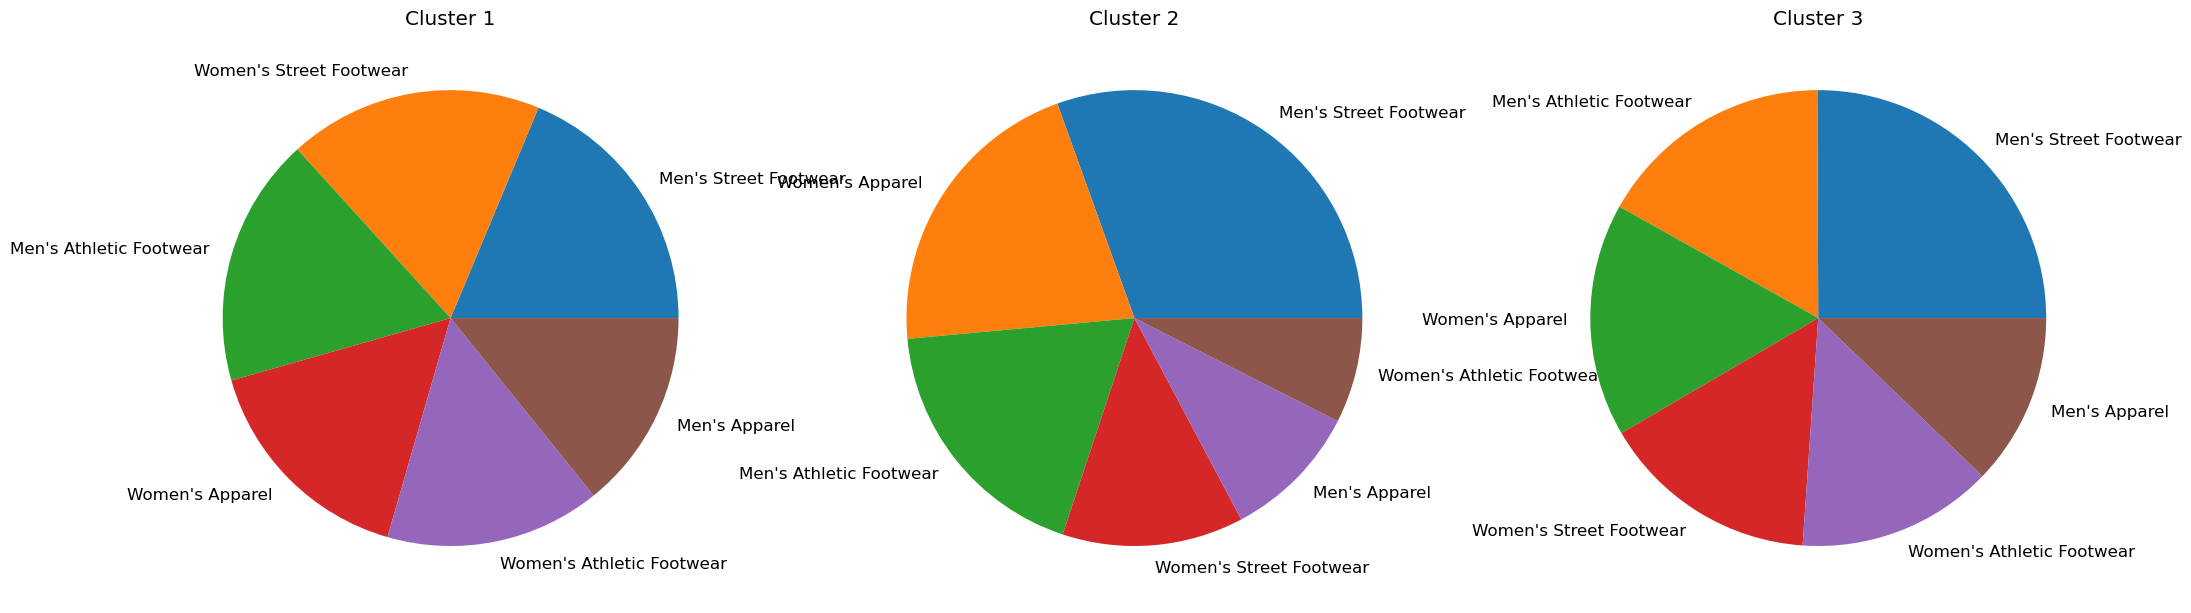

In [36]:
####  PRODUCT AS PER UNITS SOLD #####
plt.figure(figsize = (25,25))

for k in range(0,3):
    
    ax1 = plt.subplot2grid((1,3),(0,k))
    a = prototype_clusters_unscaled[(kmeans_clusters_unscaled['Clusters'] == k)][['Units Sold', 'Product']].groupby('Product').sum().sort_values(by='Units Sold', ascending=False)
    plt.rcParams['font.size'] = 12
    plt.pie(a['Units Sold'], labels = a.index.unique())
    plt.title("Cluster " + str(k+1))
    


### 2. Sales Method

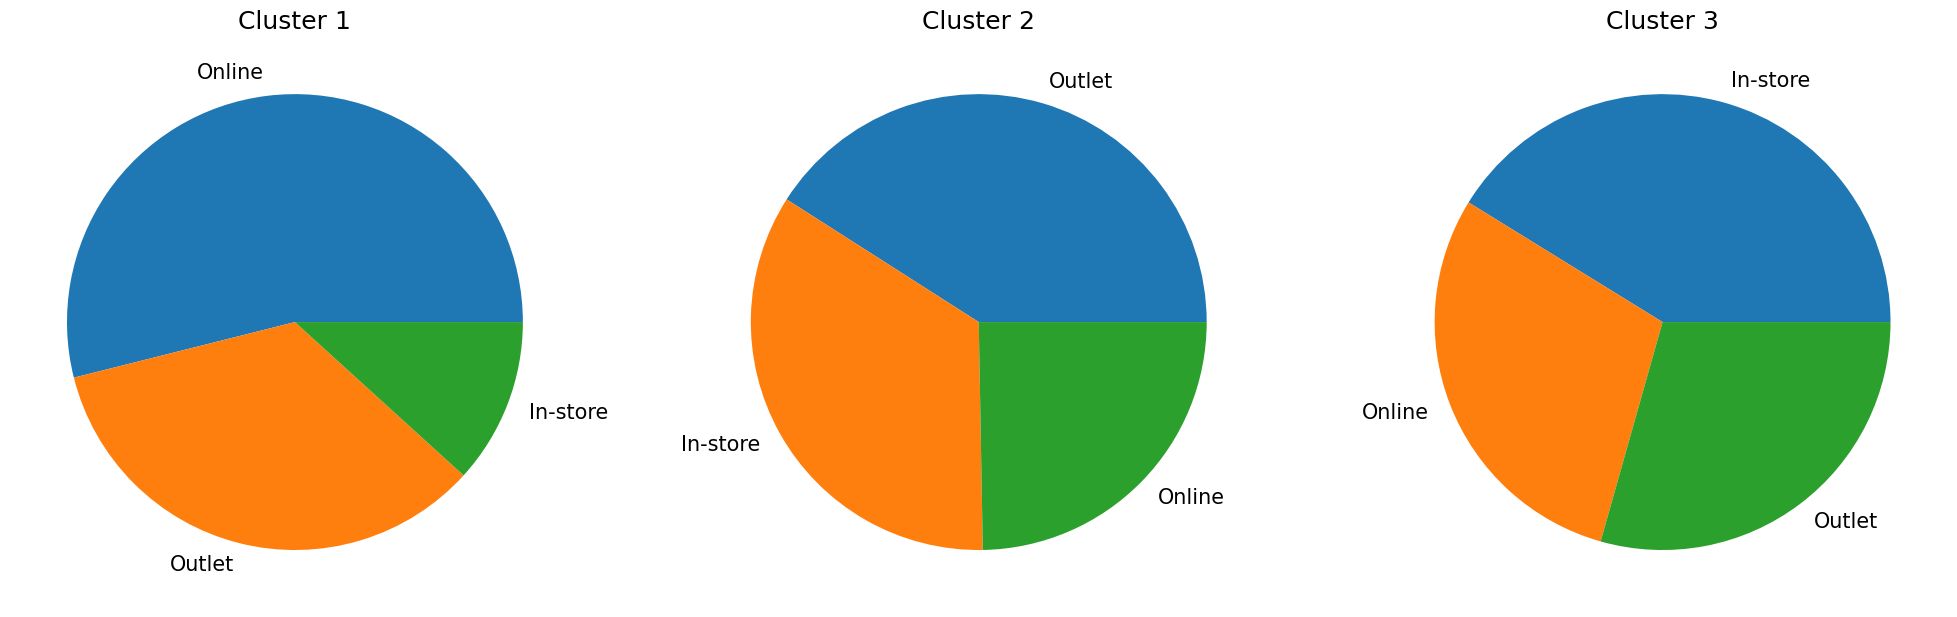

In [37]:
plt.figure(figsize = (25,25))

for k in range(0,3):
    
    ax1 = plt.subplot2grid((1,3),(0,k))
    a = prototype_clusters_unscaled[(kmeans_clusters_unscaled['Clusters'] == k)][['Units Sold', 'Sales Method']].groupby('Sales Method').sum().sort_values(by='Units Sold', ascending=False)
    plt.rcParams['font.size'] = 15
    plt.pie(a['Units Sold'], labels = a.index.unique())
    plt.title("Cluster " + str(k+1))
